# 特征工程

## 读取清洗后的数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import boxcox1p

In [2]:
train=pd.read_csv('train_clean.csv',index_col=0)

In [3]:
train

,sale_date,class_id,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,displacement,...,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track,sale_quantity
0,201609,289403,12,2,1,1,1,6,MT,1.8,...,4440,1833,1545,1695,1320,5.0,2700,1556,1562,94
1,201609,745137,637,3,2,1,2,6,DCT,1.6,...,4534,1823,1483,1711,1336,5.0,2648,1553,1544,435
2,201609,714860,831,3,2,2,3,6,AT,1.8,...,4720,1815,1465,1860,1459,5.0,2770,1579,1589,180
3,201609,175962,750,3,2,1,4,6,AT,1.6,...,4475,1706,1469,1625,1145,5.0,2603,1460,1500,40
4,201609,270690,98,2,3,3,1,5,MT,1.5,...,4415,1685,1850,1825,1236,5.0,2720,1420,1440,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,750,2,2,1,4,5,MT,1.6,...,4282,1706,1475,1600,1120,5.0,2603,1460,1500,10
20150,201607,175962,750,3,2,1,4,6,AT,1.6,...,4473,1706,1469,1635,1155,5.0,2603,1460,1500,126
20151,201607,395234,841,3,2,2,6,6,AT,2.0,...,4805,1860,1458,2065,1580,5.0,2815,1584,1551,9
20152,201608,587678,537,2,1,3,5,0,CVT,1.8,...,4294,1772,1605,1770,1302,5.0,2610,1535,1540,194


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20154 entries, 0 to 20153
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sale_date              20154 non-null  int64  
 1   class_id               20154 non-null  int64  
 2   brand_id               20154 non-null  int64  
 3   compartment            20154 non-null  int64  
 4   type_id                20154 non-null  int64  
 5   level_id               20154 non-null  int64  
 6   department_id          20154 non-null  int64  
 7   TR                     20154 non-null  object 
 8   gearbox_type           20154 non-null  object 
 9   displacement           20154 non-null  float64
 10  if_charging            20154 non-null  object 
 11  price_level            20154 non-null  object 
 12  price                  20154 non-null  float64
 13  driven_type_id         20154 non-null  int64  
 14  fuel_type_id           20154 non-null  int64  
 15  ne

特征工程草稿一览：(仅是草稿，具体操作以实际内容为准)
  
标称特征：  
class_id：onehot同时作为主码属性保留原特征  
brand_id：直接onehot  
compartment：厢数，数值大小还是有点意义的，onehot同时保留原特征  
type_id：直接onehot  
level_id：车型级别，级别有大小之分，数值大小有意义，onehot同时保留原特征  
department_id：直接onehot  
TR：直接onehot  
gearbox_type：直接onehot  
displacement：排量，数值大小还是有点意义的，onehot同时保留原特征  
if_charging：直接onehot  
price_level：直接onehot，这个不错，数值特征price不再需要手动分段做onehot了  
driven_type_id：直接onehot  
fuel_type_id：直接onehot  
newenergy_type_id：直接onehot  
emission_standards_id：直接onehot，不知道为什么没有排放标准 1,2,3,5 唯独没 4，感觉大小无意义，暂且认为作用只是标识类别  
if_MPV_id：直接onehot  
if_luxurious_id：直接onehot  
cylinder_number：缸数，数值大小应该还是有点意义的，onehot同时保留原特征  
rated_passenger：载客量，大小有点意义，onehot同时保留原特征  
  
数值特征：  
sale_quantity：标签，log1p平滑，预测后expm1转换回去  
sale_date：拆成 year month 两个特征，预测不使用sale_date作特征，但要作为主码属性保留  
price：boxcox1p平滑，已经有price_level的onehot了，不再做onehot  
power：boxcox1p平滑，考虑增加分段onehot特征  
engine_torque：boxcox1p平滑，考虑增加分段onehot特征  
car_length：boxcox1p平滑，考虑增加分段onehot特征  
car_width：boxcox1p平滑，考虑增加分段onehot特征  
car_height：boxcox1p平滑，考虑增加分段onehot特征  
total_quality：boxcox1p平滑，考虑增加分段onehot特征  
equipment_quality：boxcox1p平滑，考虑增加分段onehot特征  
wheelbase：boxcox1p平滑，考虑增加分段onehot特征  
front_track：boxcox1p平滑，考虑增加分段onehot特征  
rear_track：boxcox1p平滑，考虑增加分段onehot特征  

## 处理标称特征

保留原特征的做拷贝

In [5]:
train['class_id_oh']=train['class_id'].copy()
train['compartment_oh']=train['compartment'].copy()
train['level_id_oh']=train['level_id'].copy()
train['displacement_oh']=train['displacement'].copy()
train['cylinder_number_oh']=train['cylinder_number'].copy()
train['rated_passenger_oh']=train['rated_passenger'].copy()

get_dummies做onehot编码

In [6]:
train=pd.get_dummies(train,columns=['class_id_oh','brand_id','compartment_oh','type_id','level_id_oh','department_id','TR','gearbox_type',
                                   'displacement_oh','if_charging','price_level','driven_type_id','fuel_type_id','newenergy_type_id',
                                   'emission_standards_id','if_MPV_id','if_luxurious_id','cylinder_number_oh','rated_passenger_oh'])

In [7]:
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_length,...,cylinder_number_oh_4,cylinder_number_oh_6,rated_passenger_oh_4.0,rated_passenger_oh_4.5,rated_passenger_oh_5.0,rated_passenger_oh_6.0,rated_passenger_oh_6.5,rated_passenger_oh_7.0,rated_passenger_oh_7.5,rated_passenger_oh_9.0
0,201609,289403,2,1,1.8,9.5,98.0,4,170.0,4440,...,1,0,0,0,1,0,0,0,0,0
1,201609,745137,3,1,1.6,13.2,94.0,4,159.0,4534,...,1,0,0,0,1,0,0,0,0,0
2,201609,714860,3,2,1.8,14.4,105.0,4,176.0,4720,...,1,0,0,0,1,0,0,0,0,0
3,201609,175962,3,1,1.6,8.6,81.0,4,155.0,4475,...,1,0,0,0,1,0,0,0,0,0
4,201609,270690,2,3,1.5,3.9,82.0,4,146.5,4415,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,12.4,81.0,4,155.0,4282,...,1,0,0,0,1,0,0,0,0,0
20150,201607,175962,3,1,1.6,8.0,81.0,4,155.0,4473,...,1,0,0,0,1,0,0,0,0,0
20151,201607,395234,3,2,2.0,20.2,108.0,4,200.0,4805,...,1,0,0,0,1,0,0,0,0,0
20152,201608,587678,2,3,1.8,18.3,100.0,4,169.0,4294,...,1,0,0,0,1,0,0,0,0,0


## 处理数值特征

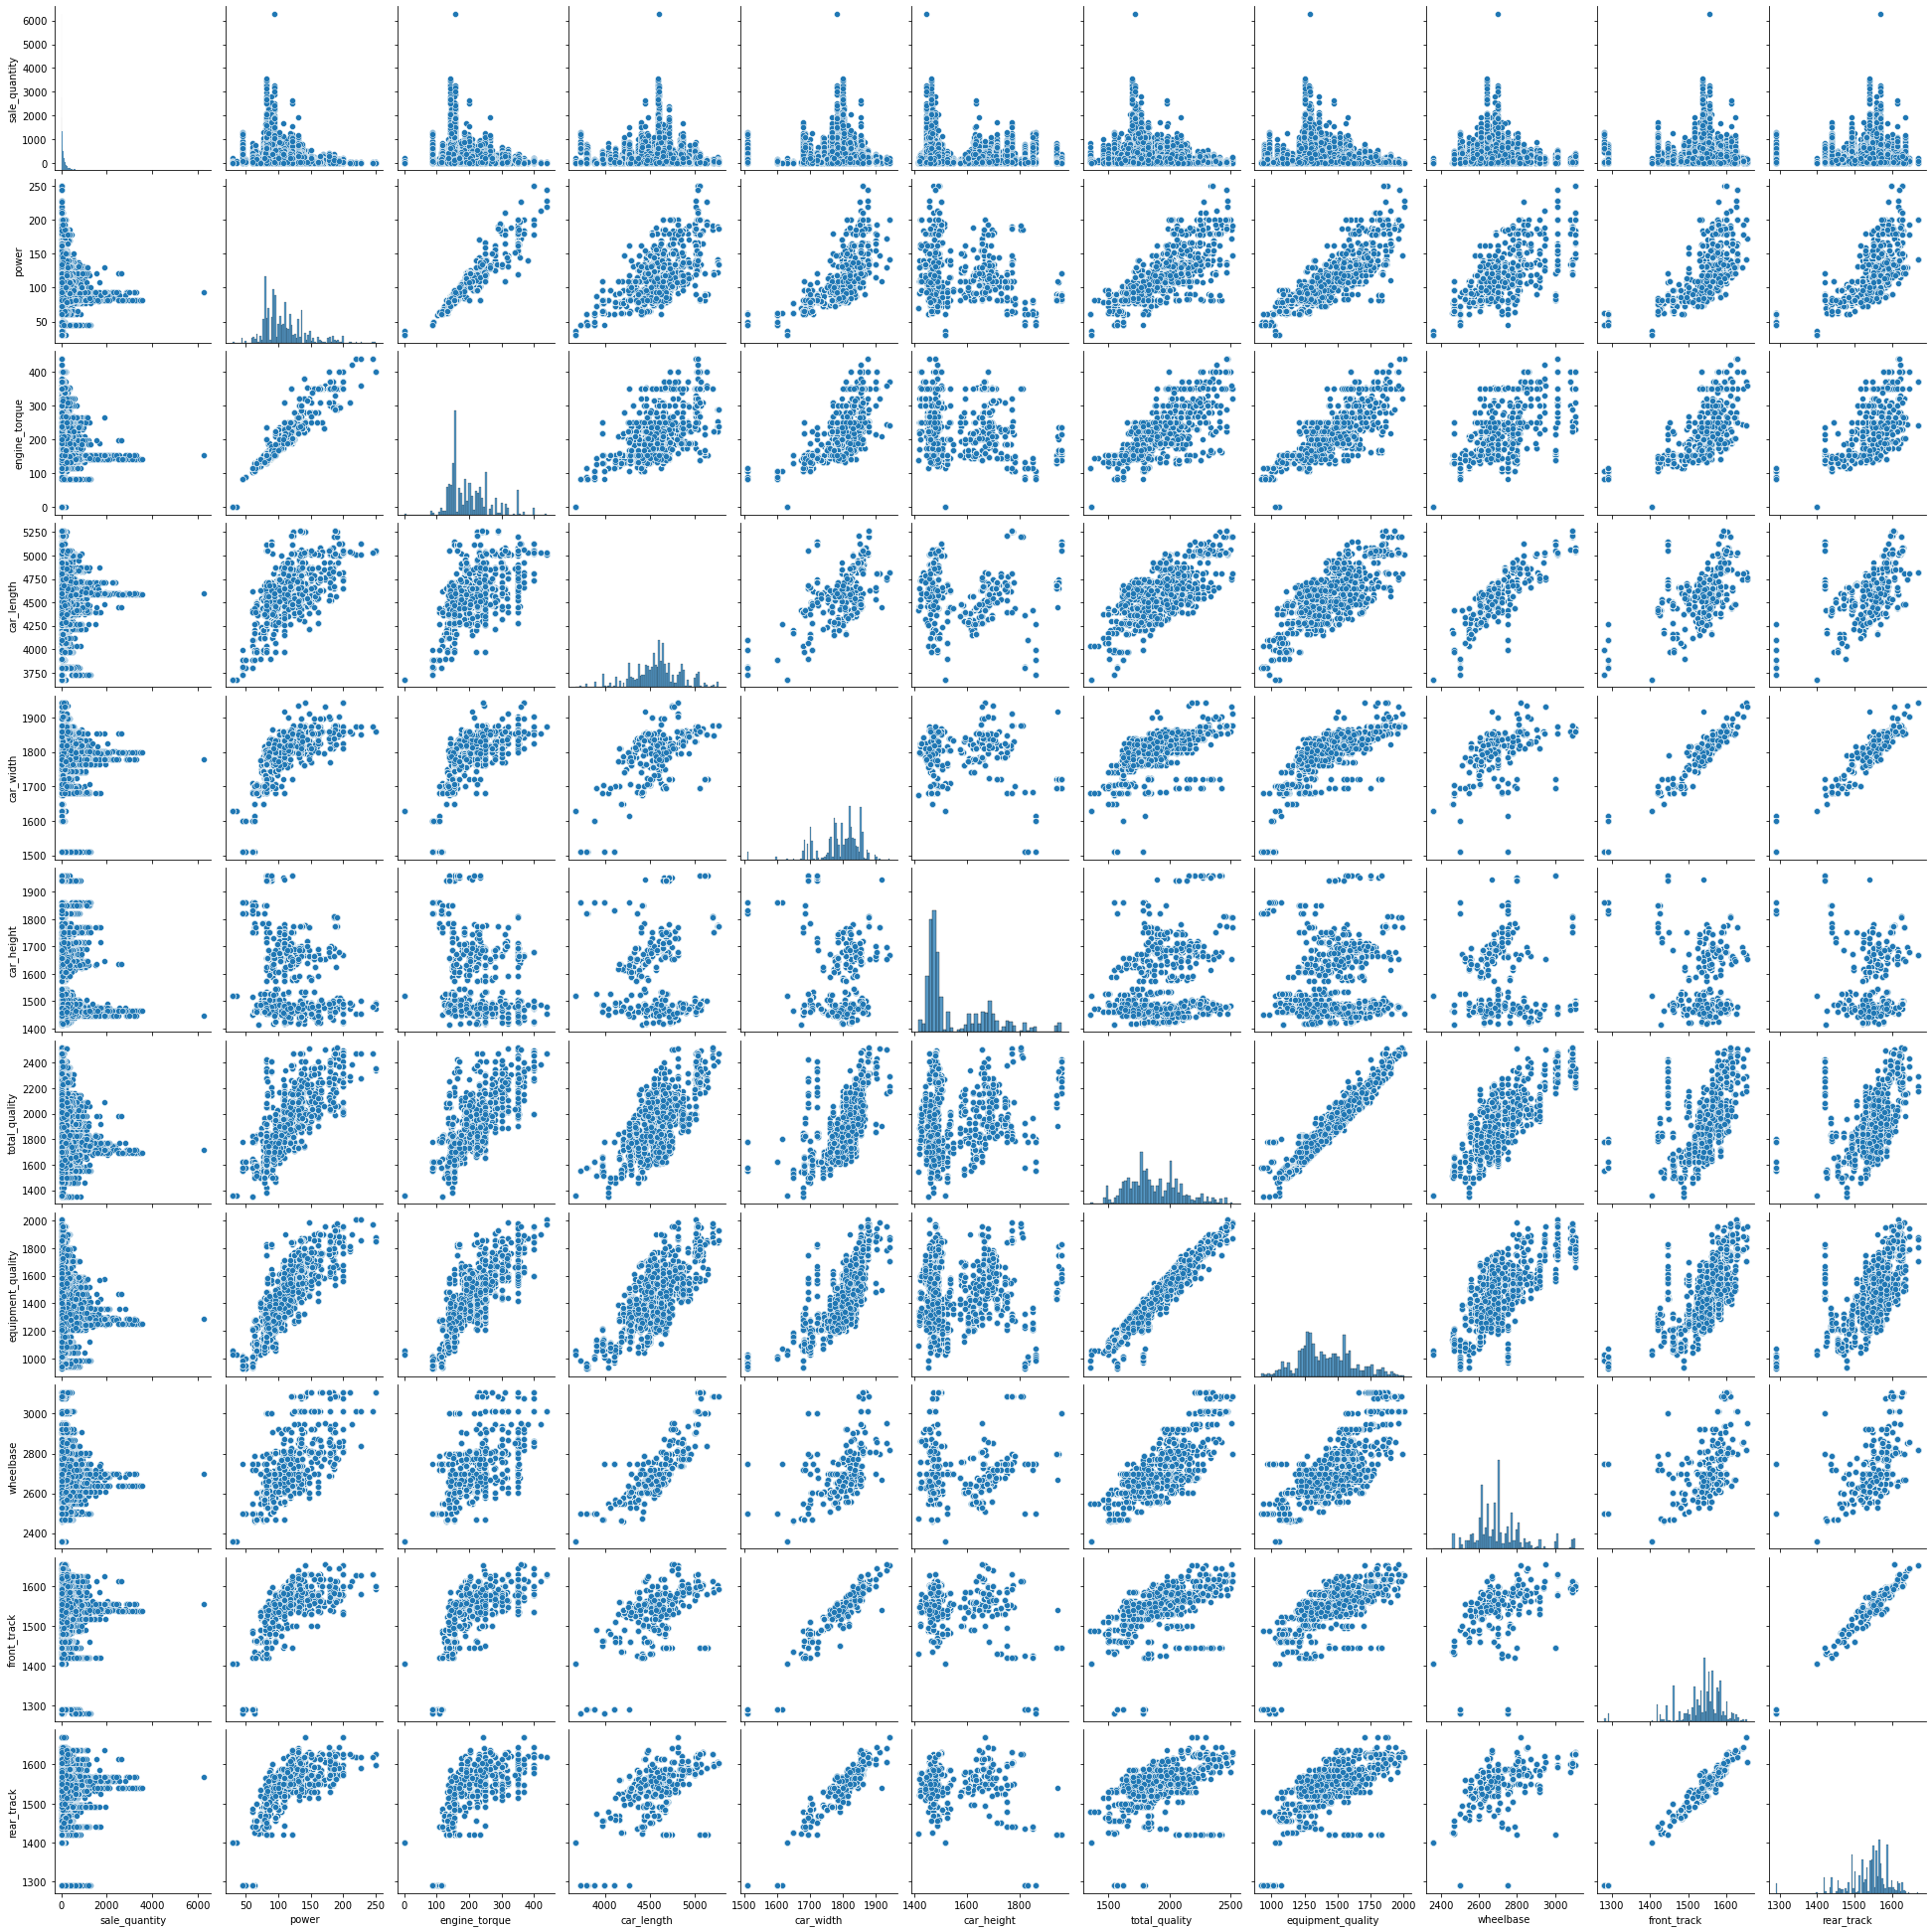

In [8]:
cols=['sale_quantity', 'power','engine_torque','car_length','car_width','car_height','total_quality','equipment_quality','wheelbase','front_track','rear_track']
sns.pairplot(train[cols],height=2.5)
plt.show()

首先可以看到这些特征的分布都是和正态有较大偏差的，有必要平滑  
其次可以看到和销量间的关系基本上都是中间高、两边低
其中 car_length、car_width、rear_track、front_track 这几个特征波动相对大一些  
观察数据探索时的相关性矩阵，和销量间的相关性0.02，需要注意的是它还是数值量  
很多 int/float 型的标称量它的数值大小不是那么有意义的，主要是用于分类标识的作用，算出的相关性肯定会低一些的  
而即便这样许多标称量都还是比这些数值特征与标签间的相关性高  
所以我们考虑直接删掉这四个特征  
然后wheelbase中间高的那一部分却有明显很少的几列异常点，考虑其相关性也不是很高，也直接删除  
其他特征加入分段的onehot  

直接删除的

In [9]:
train=train.drop(['car_length','car_width','rear_track','front_track','wheelbase'],axis=1)
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,...,cylinder_number_oh_4,cylinder_number_oh_6,rated_passenger_oh_4.0,rated_passenger_oh_4.5,rated_passenger_oh_5.0,rated_passenger_oh_6.0,rated_passenger_oh_6.5,rated_passenger_oh_7.0,rated_passenger_oh_7.5,rated_passenger_oh_9.0
0,201609,289403,2,1,1.8,9.5,98.0,4,170.0,1545,...,1,0,0,0,1,0,0,0,0,0
1,201609,745137,3,1,1.6,13.2,94.0,4,159.0,1483,...,1,0,0,0,1,0,0,0,0,0
2,201609,714860,3,2,1.8,14.4,105.0,4,176.0,1465,...,1,0,0,0,1,0,0,0,0,0
3,201609,175962,3,1,1.6,8.6,81.0,4,155.0,1469,...,1,0,0,0,1,0,0,0,0,0
4,201609,270690,2,3,1.5,3.9,82.0,4,146.5,1850,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,12.4,81.0,4,155.0,1475,...,1,0,0,0,1,0,0,0,0,0
20150,201607,175962,3,1,1.6,8.0,81.0,4,155.0,1469,...,1,0,0,0,1,0,0,0,0,0
20151,201607,395234,3,2,2.0,20.2,108.0,4,200.0,1458,...,1,0,0,0,1,0,0,0,0,0
20152,201608,587678,2,3,1.8,18.3,100.0,4,169.0,1605,...,1,0,0,0,1,0,0,0,0,0


power

<AxesSubplot:xlabel='power', ylabel='sale_quantity'>

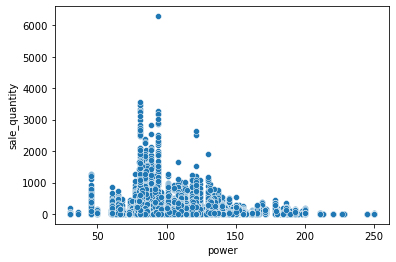

In [10]:
sns.scatterplot(x='power',y='sale_quantity',data=train)

In [11]:
print(train.loc[train['sale_quantity']>3000,'power'].min())
print(train.loc[train['sale_quantity']>3000,'power'].max())

81.0
93.8


分成 (-inf,81)、[81,93.8],(93.8,inf) 三段

In [12]:
train['power_oh_1']=(train['power']<81).astype(np.int64)
train['power_oh_2']=((train['power']>=81)&(train['power']<=93.8)).astype(np.int64)
train['power_oh_3']=(train['power']>93.8).astype(np.int64)
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,...,rated_passenger_oh_4.5,rated_passenger_oh_5.0,rated_passenger_oh_6.0,rated_passenger_oh_6.5,rated_passenger_oh_7.0,rated_passenger_oh_7.5,rated_passenger_oh_9.0,power_oh_1,power_oh_2,power_oh_3
0,201609,289403,2,1,1.8,9.5,98.0,4,170.0,1545,...,0,1,0,0,0,0,0,0,0,1
1,201609,745137,3,1,1.6,13.2,94.0,4,159.0,1483,...,0,1,0,0,0,0,0,0,0,1
2,201609,714860,3,2,1.8,14.4,105.0,4,176.0,1465,...,0,1,0,0,0,0,0,0,0,1
3,201609,175962,3,1,1.6,8.6,81.0,4,155.0,1469,...,0,1,0,0,0,0,0,0,1,0
4,201609,270690,2,3,1.5,3.9,82.0,4,146.5,1850,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,12.4,81.0,4,155.0,1475,...,0,1,0,0,0,0,0,0,1,0
20150,201607,175962,3,1,1.6,8.0,81.0,4,155.0,1469,...,0,1,0,0,0,0,0,0,1,0
20151,201607,395234,3,2,2.0,20.2,108.0,4,200.0,1458,...,0,1,0,0,0,0,0,0,0,1
20152,201608,587678,2,3,1.8,18.3,100.0,4,169.0,1605,...,0,1,0,0,0,0,0,0,0,1


engine_torque

<AxesSubplot:xlabel='engine_torque', ylabel='sale_quantity'>

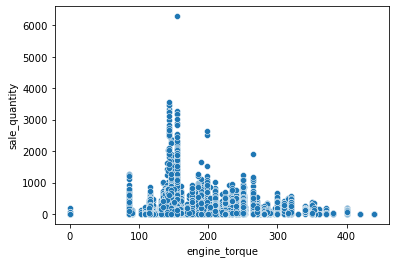

In [13]:
sns.scatterplot(x='engine_torque',y='sale_quantity',data=train)

In [14]:
print(train.loc[train['sale_quantity']>3000,'engine_torque'].min())

143.0


右侧基本上可以看成一条下降的曲线  
分成 0、(0,143)、[143,inf) 三段

In [15]:
train['engine_torque_oh_1']=(train['engine_torque']==0).astype(np.int64)
train['engine_torque_oh_2']=((train['engine_torque']>0)&(train['engine_torque']<143)).astype(np.int64)
train['engine_torque_oh_3']=(train['engine_torque']>=143).astype(np.int64)
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,...,rated_passenger_oh_6.5,rated_passenger_oh_7.0,rated_passenger_oh_7.5,rated_passenger_oh_9.0,power_oh_1,power_oh_2,power_oh_3,engine_torque_oh_1,engine_torque_oh_2,engine_torque_oh_3
0,201609,289403,2,1,1.8,9.5,98.0,4,170.0,1545,...,0,0,0,0,0,0,1,0,0,1
1,201609,745137,3,1,1.6,13.2,94.0,4,159.0,1483,...,0,0,0,0,0,0,1,0,0,1
2,201609,714860,3,2,1.8,14.4,105.0,4,176.0,1465,...,0,0,0,0,0,0,1,0,0,1
3,201609,175962,3,1,1.6,8.6,81.0,4,155.0,1469,...,0,0,0,0,0,1,0,0,0,1
4,201609,270690,2,3,1.5,3.9,82.0,4,146.5,1850,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,12.4,81.0,4,155.0,1475,...,0,0,0,0,0,1,0,0,0,1
20150,201607,175962,3,1,1.6,8.0,81.0,4,155.0,1469,...,0,0,0,0,0,1,0,0,0,1
20151,201607,395234,3,2,2.0,20.2,108.0,4,200.0,1458,...,0,0,0,0,0,0,1,0,0,1
20152,201608,587678,2,3,1.8,18.3,100.0,4,169.0,1605,...,0,0,0,0,0,0,1,0,0,1


car_height

<AxesSubplot:xlabel='car_height', ylabel='sale_quantity'>

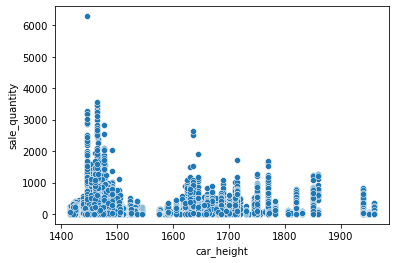

In [16]:
sns.scatterplot(x='car_height',y='sale_quantity',data=train)

In [17]:
print(train.loc[train['sale_quantity']>2700,'car_height'].min())
print(train.loc[train['sale_quantity']>2700,'car_height'].max())
print(train.loc[(train['car_height']>1550)&(train['sale_quantity']>1000),'car_height'].min())

1445
1477
1625


可以分成四段，左侧开头特别低的一段，左侧特别高的一段，然后中间左侧那块整体低的一段，右边维持稳定小幅下滑的一段  
(-inf,1445)、[1445,1477]、(1477,1625)、[1625,inf) 四段

In [18]:
train['car_height_oh_1']=(train['car_height']<1445).astype(np.int64)
train['car_height_oh_2']=((train['car_height']>=1445)&(train['power']<=1477)).astype(np.int64)
train['car_height_oh_3']=((train['car_height']>=1477)&(train['power']<1625)).astype(np.int64)
train['car_height_oh_4']=(train['car_height']>=1625).astype(np.int64)
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,...,power_oh_1,power_oh_2,power_oh_3,engine_torque_oh_1,engine_torque_oh_2,engine_torque_oh_3,car_height_oh_1,car_height_oh_2,car_height_oh_3,car_height_oh_4
0,201609,289403,2,1,1.8,9.5,98.0,4,170.0,1545,...,0,0,1,0,0,1,0,1,1,0
1,201609,745137,3,1,1.6,13.2,94.0,4,159.0,1483,...,0,0,1,0,0,1,0,1,1,0
2,201609,714860,3,2,1.8,14.4,105.0,4,176.0,1465,...,0,0,1,0,0,1,0,1,0,0
3,201609,175962,3,1,1.6,8.6,81.0,4,155.0,1469,...,0,1,0,0,0,1,0,1,0,0
4,201609,270690,2,3,1.5,3.9,82.0,4,146.5,1850,...,0,1,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,12.4,81.0,4,155.0,1475,...,0,1,0,0,0,1,0,1,0,0
20150,201607,175962,3,1,1.6,8.0,81.0,4,155.0,1469,...,0,1,0,0,0,1,0,1,0,0
20151,201607,395234,3,2,2.0,20.2,108.0,4,200.0,1458,...,0,0,1,0,0,1,0,1,0,0
20152,201608,587678,2,3,1.8,18.3,100.0,4,169.0,1605,...,0,0,1,0,0,1,0,1,1,0


total_quality

<AxesSubplot:xlabel='total_quality', ylabel='sale_quantity'>

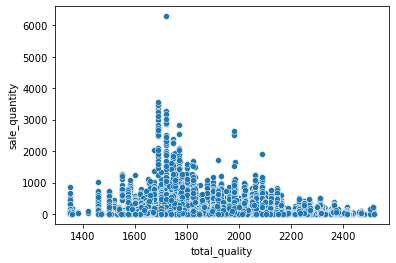

In [19]:
sns.scatterplot(x='total_quality',y='sale_quantity',data=train)

In [20]:
print(train.loc[train['sale_quantity']>3000,'total_quality'].min())
print(train.loc[train['sale_quantity']>2800,'total_quality'].max())

1690
1770


分成 (-inf,1690)、[1690,1770]、(1770,inf) 三段

In [21]:
train['total_quality_oh_1']=(train['total_quality']<1690).astype(np.int64)
train['total_quality_oh_2']=((train['total_quality']>=1690)&(train['power']<=1770)).astype(np.int64)
train['total_quality_oh_3']=(train['total_quality']>1770).astype(np.int64)
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,...,engine_torque_oh_1,engine_torque_oh_2,engine_torque_oh_3,car_height_oh_1,car_height_oh_2,car_height_oh_3,car_height_oh_4,total_quality_oh_1,total_quality_oh_2,total_quality_oh_3
0,201609,289403,2,1,1.8,9.5,98.0,4,170.0,1545,...,0,0,1,0,1,1,0,0,1,0
1,201609,745137,3,1,1.6,13.2,94.0,4,159.0,1483,...,0,0,1,0,1,1,0,0,1,0
2,201609,714860,3,2,1.8,14.4,105.0,4,176.0,1465,...,0,0,1,0,1,0,0,0,1,1
3,201609,175962,3,1,1.6,8.6,81.0,4,155.0,1469,...,0,0,1,0,1,0,0,1,0,0
4,201609,270690,2,3,1.5,3.9,82.0,4,146.5,1850,...,0,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,12.4,81.0,4,155.0,1475,...,0,0,1,0,1,0,0,1,0,0
20150,201607,175962,3,1,1.6,8.0,81.0,4,155.0,1469,...,0,0,1,0,1,0,0,1,0,0
20151,201607,395234,3,2,2.0,20.2,108.0,4,200.0,1458,...,0,0,1,0,1,0,0,0,1,1
20152,201608,587678,2,3,1.8,18.3,100.0,4,169.0,1605,...,0,0,1,0,1,1,0,0,1,0


equipment_quality

<AxesSubplot:xlabel='equipment_quality', ylabel='sale_quantity'>

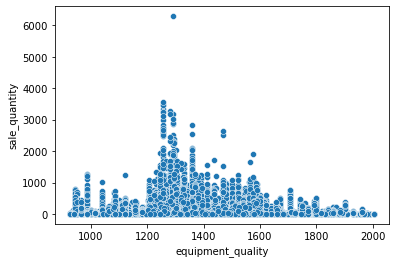

In [22]:
sns.scatterplot(x='equipment_quality',y='sale_quantity',data=train)

In [23]:
print(train.loc[train['sale_quantity']>3000,'equipment_quality'].min())
print(train.loc[train['sale_quantity']>2800,'equipment_quality'].max())

1255
1360


分成 (-inf,1255)、[1255,1360]、(1360,inf) 三段

In [24]:
train['equipment_quality_oh_1']=(train['equipment_quality']<1255).astype(np.int64)
train['equipment_quality_oh_2']=((train['equipment_quality']>=1255)&(train['power']<=1360)).astype(np.int64)
train['equipment_quality_oh_3']=(train['equipment_quality']>1360).astype(np.int64)
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,...,car_height_oh_1,car_height_oh_2,car_height_oh_3,car_height_oh_4,total_quality_oh_1,total_quality_oh_2,total_quality_oh_3,equipment_quality_oh_1,equipment_quality_oh_2,equipment_quality_oh_3
0,201609,289403,2,1,1.8,9.5,98.0,4,170.0,1545,...,0,1,1,0,0,1,0,0,1,0
1,201609,745137,3,1,1.6,13.2,94.0,4,159.0,1483,...,0,1,1,0,0,1,0,0,1,0
2,201609,714860,3,2,1.8,14.4,105.0,4,176.0,1465,...,0,1,0,0,0,1,1,0,1,1
3,201609,175962,3,1,1.6,8.6,81.0,4,155.0,1469,...,0,1,0,0,1,0,0,1,0,0
4,201609,270690,2,3,1.5,3.9,82.0,4,146.5,1850,...,0,1,1,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,12.4,81.0,4,155.0,1475,...,0,1,0,0,1,0,0,1,0,0
20150,201607,175962,3,1,1.6,8.0,81.0,4,155.0,1469,...,0,1,0,0,1,0,0,1,0,0
20151,201607,395234,3,2,2.0,20.2,108.0,4,200.0,1458,...,0,1,0,0,0,1,1,0,1,1
20152,201608,587678,2,3,1.8,18.3,100.0,4,169.0,1605,...,0,1,1,0,0,1,0,0,1,0


sale_date -> year, month

In [25]:
train['year']=train['sale_date']//100
train['month']=train['sale_date']%100
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,...,car_height_oh_3,car_height_oh_4,total_quality_oh_1,total_quality_oh_2,total_quality_oh_3,equipment_quality_oh_1,equipment_quality_oh_2,equipment_quality_oh_3,year,month
0,201609,289403,2,1,1.8,9.5,98.0,4,170.0,1545,...,1,0,0,1,0,0,1,0,2016,9
1,201609,745137,3,1,1.6,13.2,94.0,4,159.0,1483,...,1,0,0,1,0,0,1,0,2016,9
2,201609,714860,3,2,1.8,14.4,105.0,4,176.0,1465,...,0,0,0,1,1,0,1,1,2016,9
3,201609,175962,3,1,1.6,8.6,81.0,4,155.0,1469,...,0,0,1,0,0,1,0,0,2016,9
4,201609,270690,2,3,1.5,3.9,82.0,4,146.5,1850,...,1,1,0,1,1,1,0,0,2016,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,12.4,81.0,4,155.0,1475,...,0,0,1,0,0,1,0,0,2016,7
20150,201607,175962,3,1,1.6,8.0,81.0,4,155.0,1469,...,0,0,1,0,0,1,0,0,2016,7
20151,201607,395234,3,2,2.0,20.2,108.0,4,200.0,1458,...,0,0,0,1,1,0,1,1,2016,7
20152,201608,587678,2,3,1.8,18.3,100.0,4,169.0,1605,...,1,0,0,1,0,0,1,0,2016,8


sale_quantity -> log1p

In [26]:
# 标签扔最后一列，看着方便
tmp=train.pop('sale_quantity')
train['sale_quantity']=tmp
# 实际预测使用 log1p 平滑后的那列，预测后 expm1 转换回来
train['sale_quantity_log1p']=np.log1p(train['sale_quantity'])
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,...,total_quality_oh_1,total_quality_oh_2,total_quality_oh_3,equipment_quality_oh_1,equipment_quality_oh_2,equipment_quality_oh_3,year,month,sale_quantity,sale_quantity_log1p
0,201609,289403,2,1,1.8,9.5,98.0,4,170.0,1545,...,0,1,0,0,1,0,2016,9,94,4.553877
1,201609,745137,3,1,1.6,13.2,94.0,4,159.0,1483,...,0,1,0,0,1,0,2016,9,435,6.077642
2,201609,714860,3,2,1.8,14.4,105.0,4,176.0,1465,...,0,1,1,0,1,1,2016,9,180,5.198497
3,201609,175962,3,1,1.6,8.6,81.0,4,155.0,1469,...,1,0,0,1,0,0,2016,9,40,3.713572
4,201609,270690,2,3,1.5,3.9,82.0,4,146.5,1850,...,0,1,1,1,0,0,2016,9,19,2.995732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,12.4,81.0,4,155.0,1475,...,1,0,0,1,0,0,2016,7,10,2.397895
20150,201607,175962,3,1,1.6,8.0,81.0,4,155.0,1469,...,1,0,0,1,0,0,2016,7,126,4.844187
20151,201607,395234,3,2,2.0,20.2,108.0,4,200.0,1458,...,0,1,1,0,1,1,2016,7,9,2.302585
20152,201608,587678,2,3,1.8,18.3,100.0,4,169.0,1605,...,0,1,0,0,1,0,2016,8,194,5.273000


其余数值特征均用boxcox1p平滑

In [27]:
cols=['price','power','engine_torque','car_height','total_quality','equipment_quality']
lam=0.15
for col in cols:
    train[col]=boxcox1p(train[col],lam)
train

,sale_date,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,...,total_quality_oh_1,total_quality_oh_2,total_quality_oh_3,equipment_quality_oh_1,equipment_quality_oh_2,equipment_quality_oh_3,year,month,sale_quantity,sale_quantity_log1p
0,201609,289403,2,1,1.8,2.819421,6.615044,4,7.749778,13.391451,...,0,1,0,0,1,0,2016,9,94,4.553877
1,201609,745137,3,1,1.6,3.258824,6.533131,4,7.606710,13.268682,...,0,1,0,0,1,0,2016,9,435,6.077642
2,201609,714860,3,2,1.8,3.380344,6.751853,4,7.824546,13.232223,...,0,1,1,0,1,1,2016,9,180,5.198497
3,201609,175962,3,1,1.6,2.692764,6.244956,4,7.552608,13.240357,...,1,0,0,1,0,0,2016,9,40,3.713572
4,201609,270690,2,3,1.5,1.794654,6.268453,4,7.433607,13.940567,...,0,1,1,1,0,0,2016,9,19,2.995732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,201607,810398,2,1,1.6,3.172866,6.244956,4,7.552608,13.252524,...,1,0,0,1,0,0,2016,7,10,2.397895
20150,201607,175962,3,1,1.6,2.602594,6.244956,4,7.552608,13.240357,...,1,0,0,1,0,0,2016,7,126,4.844187
20151,201607,395234,3,2,2.0,3.873783,6.808145,4,8.103594,13.217941,...,0,1,1,0,1,1,2016,7,9,2.302585
20152,201608,587678,2,3,1.8,3.726367,6.654950,4,7.737100,13.506337,...,0,1,0,0,1,0,2016,8,194,5.273000


## xboost 预测重新填充 201612、201701 销量数据

到此为止，我们的特征工程还远远没有结束，只能说完成了一半  
做完了这些特征选择之后，我们就可以基于车辆特征先预测一次，对201612、201701重新填充  
这部分预测我们直接选用性能比较稳定的xgboost  
这块的填充预测不一定要调出一个极限得好得水平，不会很差，稳定的好才是最重要的  
先看一下重新填充前的 销量-年月 条形图

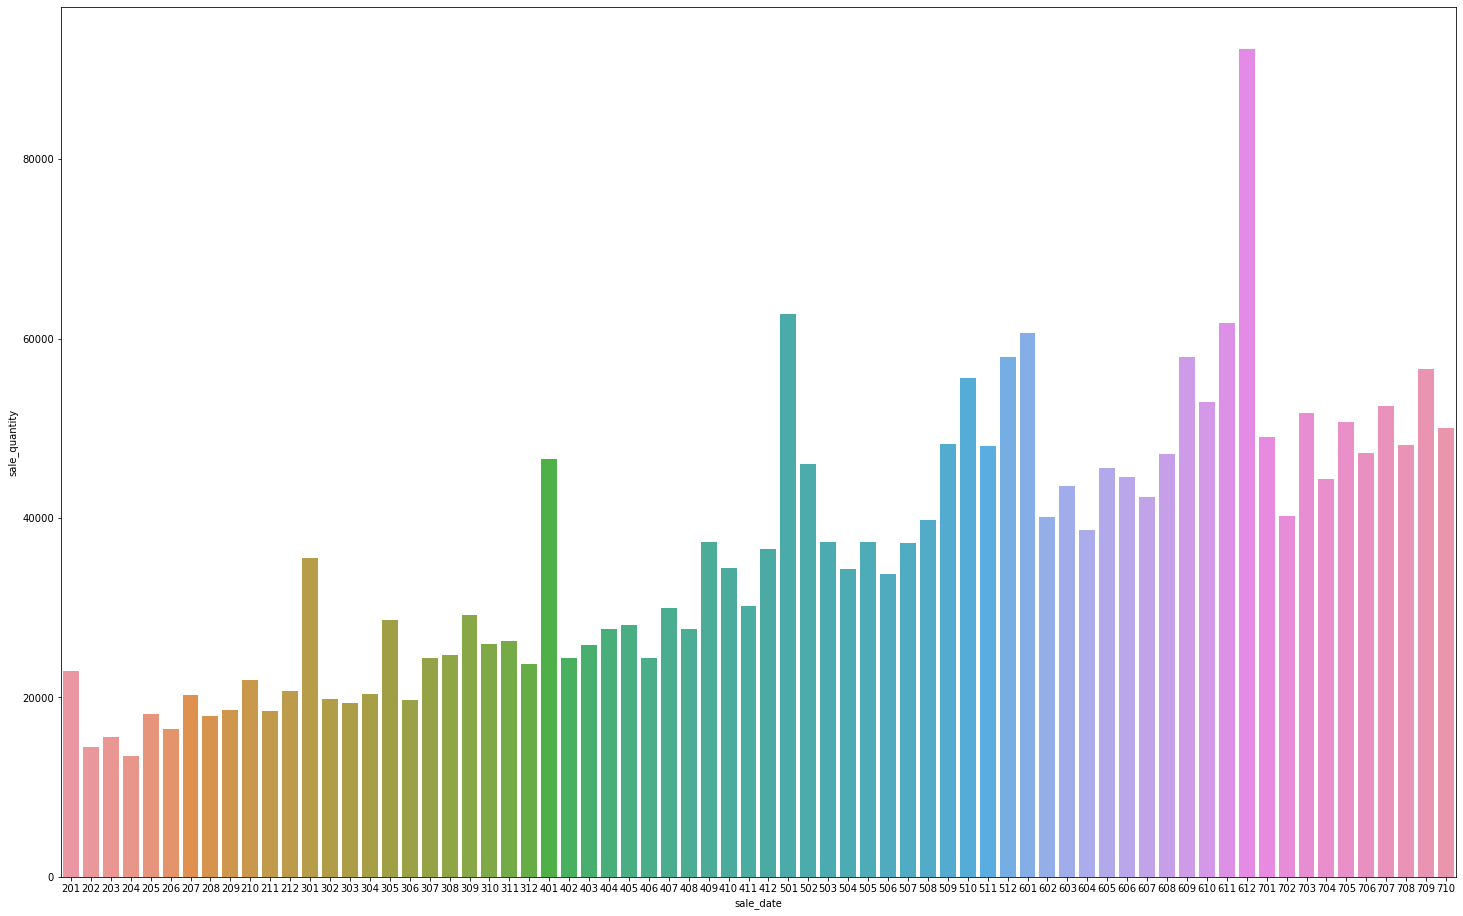

In [28]:
quantity_sum=train.groupby('sale_date')['sale_quantity'].sum()
data_group=pd.DataFrame({'sale_date':quantity_sum.index.tolist(),'sale_quantity':quantity_sum.values.tolist()})
data_group['sale_date']=data_group['sale_date']%1000
plt.figure(figsize=(25,16))
sns.barplot(x='sale_date',y='sale_quantity',data=data_group)
plt.show()

In [29]:
train_index=train[(train['sale_date']!=201612)&(train['sale_date']!=201701)].index.tolist()
na_index=train[(train['sale_date']==201612)|(train['sale_date']==201701)].index.tolist()

In [30]:
X_train=train.iloc[train_index,2:-2]
X_na=train.iloc[na_index,2:-2]
y_train=train.iloc[train_index,-1]

定义五折交叉验证函数用于评分调参

In [31]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse=-cross_val_score(model,X_train,y_train,scoring='neg_root_mean_squared_error',cv=5)
    return rmse.mean(),rmse.std()

In [32]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
rmse_cv(xgb)

(0.8650771572729257, 0.08412307545822886)

不太会分析参数，调参使用的是网格搜索+手动瞎试  
这里就省略调参过程的记录了  

In [33]:
xgb=XGBRegressor(colsample_bytree=0.4,gamma=0.045,learning_rate=0.07,max_depth=20,min_child_weight=1.5,
                 n_estimators=300,reg_alpha=0.65,reg_lambda=0.45,subsample=0.95)
rmse_cv(xgb)

(0.8074660795725574, 0.11866717484899736)

训练然后对那两个月预测

In [34]:
xgb.fit(X_train,y_train)
y_pred=np.expm1(xgb.predict(X_na))

重新填充并观察效果

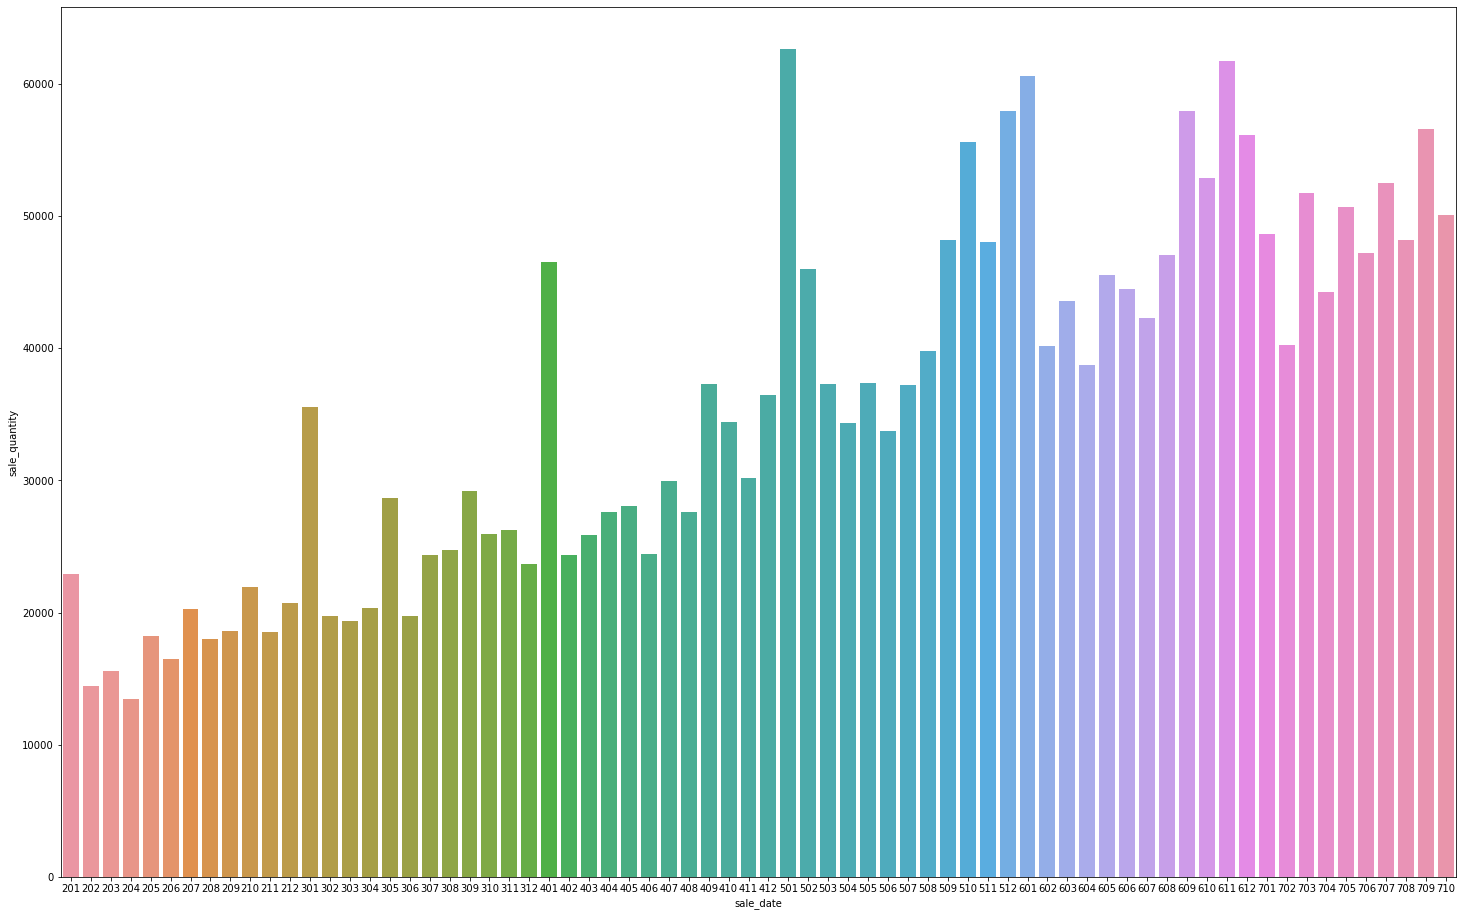

In [35]:
train.iloc[na_index,-2]=y_pred
quantity_sum=train.groupby('sale_date')['sale_quantity'].sum()
data_group=pd.DataFrame({'sale_date':quantity_sum.index.tolist(),'sale_quantity':quantity_sum.values.tolist()})
data_group['sale_date']=data_group['sale_date']%1000
plt.figure(figsize=(25,16))
sns.barplot(x='sale_date',y='sale_quantity',data=data_group)
plt.show()

感觉预测得有点过于保守了，可以手动整体倍乘扩大一下  
201611也挺多的，那么这个正不正常呢
观察到数据中很多'大小月波动'，连续的涨一个月降一个月  
2016本身整体就多一点点，而且波动还是反着来的  
201611和201510相比来看，可以认为是正常的  
2016和2017的波动也很相似  
按照这个波动，201701比201612小一点点也可以认为是正常的  
但是现在这个预测过于保守，有点偏小，个人认为整体扩大个1.15倍左右会好一些  

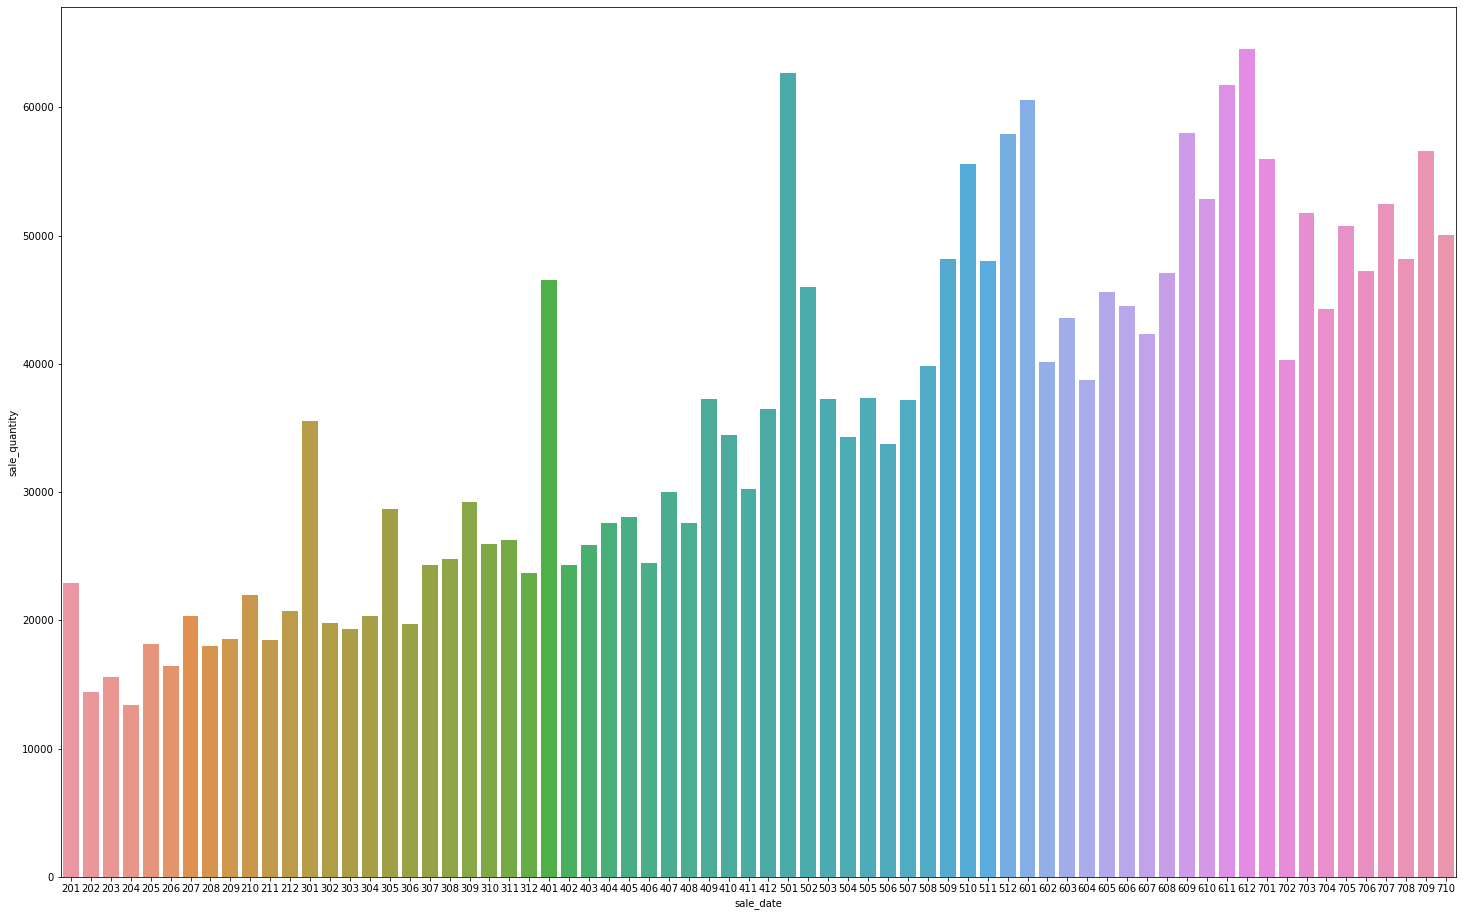

In [36]:
train.iloc[na_index,-2]=y_pred*1.15
quantity_sum=train.groupby('sale_date')['sale_quantity'].sum()
data_group=pd.DataFrame({'sale_date':quantity_sum.index.tolist(),'sale_quantity':quantity_sum.values.tolist()})
data_group['sale_date']=data_group['sale_date']%1000
plt.figure(figsize=(25,16))
sns.barplot(x='sale_date',y='sale_quantity',data=data_group)
plt.show()

大致就是这个样子  
然后为了预测未知的201711和201712  
我们还要进一步分组，并引入时间特征  

## 分组，引入时间特征

首先把日期拆分成onehot，对应赋值为销量

In [37]:
train=train.drop(['year','month','sale_quantity_log1p'],axis=1)
train['sale_date_oh']=train['sale_date'].copy()
train=pd.get_dummies(train,columns=['sale_date_oh'])
for i in range(len(train)):
    date=str(train.loc[i,'sale_date'])
    quantity=float(train.loc[i,'sale_quantity'])
    train.loc[i,'sale_date_oh_'+date]=quantity
train.pop('sale_quantity') # 删掉 sale_quantity
train.pop('sale_date') # 删掉 sale_date
train

,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,total_quality,...,sale_date_oh_201701,sale_date_oh_201702,sale_date_oh_201703,sale_date_oh_201704,sale_date_oh_201705,sale_date_oh_201706,sale_date_oh_201707,sale_date_oh_201708,sale_date_oh_201709,sale_date_oh_201710
0,289403,2,1,1.8,2.819421,6.615044,4,7.749778,13.391451,13.672007,...,0.0,0,0,0,0,0,0,0,0,0
1,745137,3,1,1.6,3.258824,6.533131,4,7.606710,13.268682,13.700673,...,0.0,0,0,0,0,0,0,0,0,0
2,714860,3,2,1.8,3.380344,6.751853,4,7.824546,13.232223,13.957229,...,0.0,0,0,0,0,0,0,0,0,0
3,175962,3,1,1.6,2.692764,6.244956,4,7.552608,13.240357,13.543822,...,0.0,0,0,0,0,0,0,0,0,0
4,270690,2,3,1.5,1.794654,6.268453,4,7.433607,13.940567,13.898577,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20149,810398,2,1,1.6,3.172866,6.244956,4,7.552608,13.252524,13.496904,...,0.0,0,0,0,0,0,0,0,0,0
20150,175962,3,1,1.6,2.602594,6.244956,4,7.552608,13.240357,13.562418,...,0.0,0,0,0,0,0,0,0,0,0
20151,395234,3,2,2.0,3.873783,6.808145,4,8.103594,13.217941,14.283057,...,0.0,0,0,0,0,0,0,0,0,0
20152,587678,2,3,1.8,3.726367,6.654950,4,7.737100,13.506337,13.804450,...,0.0,0,0,0,0,0,0,0,0,0


按id和所有配置分组，把每个 年月 的销量求和  
然后数据比较稀疏，不适合做平滑，就不标准化了  
做一下一阶差分和二阶差分  
同月不同年的一阶差分和二阶差分  
本来还想做下环比增长和同比增长，但是太稀疏了，所以就不做了  
得到我们特征工程最终的数据集

In [38]:
train=train.groupby(train.columns.tolist()[:-70]).sum()
train

sale_date_oh_201201  \
class_id compartment level_id displacement price    power    cylinder_number engine_torque car_height total_quality equipment_quality rated_passenger class_id_oh_103507 class_id_oh_124140 class_id_oh_125403 class_id_oh_136916 class_id_oh_169673 class_id_oh_175962 class_id_oh_178529 class_id_oh_186250 class_id_oh_194201 class_id_oh_194450 class_id_oh_198427 class_id_oh_206765 class_id_oh_209945 class_id_oh_219195 class_id_oh_221795 class_id_oh_245609 class_id_oh_248352 class_id_oh_249875 class_id_oh_250658 class_id_oh_265980 class_id_oh_270690 class_id_oh_281301 class_id_oh_281792 class_id_oh_289386 class_id_oh_289403 class_id_oh_290854 class_id_oh_291086 class_id_oh_291514 class_id_oh_302513 class_id_oh_304458 class_id_oh_308913 class_id_oh_321683 class_id_oh_340175 class_id_oh_347384 class_id_oh_348641 class_id_oh_349023 class_id_oh_350259 class_id_oh_354068 class_id_oh_356986 class_id_oh_359378 class_id_oh_360648 class_id_oh_376193 class_id_oh_378356 class_id_oh_378536 class_id_oh_379265 class_id_oh_379876 class_id_oh_384924 class_id_oh_392593 class_id_oh_395234 class_id_oh_401052 class_id_oh_409854 class_id_oh_412240 class_id_oh_416749 class_id_oh_417803 class_id_oh_425432 class_id_oh_436105 class_id_oh_437063 class_id_oh_437598 class_id_oh_453752 class_id_oh_468392 class_id_oh_472603 class_id_oh_475895 class_id_oh_481950 class_id_oh_482497 class_id_oh_492952 class_id_oh_496459 class_id_oh_501564 class_id_oh_510309 class_id_oh_516750 class_id_oh_526401 class_id_oh_527765 class_id_oh_527809 class_id_oh_540712 class_id_oh_559132 class_id_oh_560265 class_id_oh_569154 class_id_oh_576298 class_id_oh_580470 class_id_oh_580634 class_id_oh_587678 class_id_oh_591790 class_id_oh_597927 class_id_oh_603972 class_id_oh_612523 class_id_oh_614059 class_id_oh_619401 class_id_oh_621073 class_id_oh_628041 class_id_oh_649213 class_id_oh_651347 class_id_oh_651782 class_id_oh_653436 class_id_oh_654134 class_id_oh_671482 class_id_oh_682651 class_id_oh_683364 class_id_oh_687270 class_id_oh_692703 class_id_oh_693436 class_id_oh_713651 class_id_oh_714150 class_id_oh_714152 class_id_oh_714860 class_id_oh_725137 class_id_oh_732758 class_id_oh_735971 class_id_oh_736094 class_id_oh_739296 class_id_oh_741152 class_id_oh_743957 class_id_oh_745137 class_id_oh_750340 class_id_oh_760412 class_id_oh_786351 class_id_oh_789290 class_id_oh_810398 class_id_oh_815230 class_id_oh_819061 class_id_oh_842246 class_id_oh_851857 class_id_oh_854079 class_id_oh_854548 class_id_oh_861459 class_id_oh_871642 class_id_oh_872180 class_id_oh_883691 class_id_oh_890189 class_id_oh_905061 class_id_oh_905745 class_id_oh_914348 class_id_oh_923841 class_id_oh_924154 class_id_oh_948936 class_id_oh_950264 class_id_oh_953842 class_id_oh_961362 class_id_oh_961962 class_id_oh_963845 class_id_oh_973106 class_id_oh_978089 brand_id_12 brand_id_49 brand_id_68 brand_id_75 brand_id_76 brand_id_98 brand_id_106 brand_id_126 brand_id_236 brand_id_290 brand_id_294 brand_id_304 brand_id_450 brand_id_497 brand_id_498 brand_id_512 brand_id_537 brand_id_542 brand_id_637 brand_id_638 brand_id_682 brand_id_692 brand_id_750 brand_id_761 brand_id_783 brand_id_807 brand_id_813 brand_id_814 brand_id_831 brand_id_836 brand_id_841 brand_id_864 brand_id_872 brand_id_923 brand_id_953 brand_id_985 compartment_oh_1 compartment_oh_2 compartment_oh_3 type_id_1 type_id_2 type_id_3 type_id_4 level_id_oh_1 level_id_oh_2 level_id_oh_3 level_id_oh_4 level_id_oh_5 department_id_1 department_id_2 department_id_3 department_id_4 department_id_5 department_id_6 department_id_7 TR_0 TR_1 TR_4 TR_5 TR_5;4 TR_6 TR_7 TR_8 TR_8;7 TR_9 gearbox_type_AMT gearbox_type_AT gearbox_type_AT;DCT gearbox_type_CVT gearbox_type_DCT gearbox_type_MT gearbox_type_MT;AT displacement_oh_0.0 displacement_oh_1.0 displacement_oh_1.1 displacement_oh_1.2 displacement_oh_1.3 displacement_oh_1.4 displacement_oh_1.5 displacement_oh_1.6 displacement_oh_1.8 displacement_oh_1.9 displacement_oh_2.0 displacement_oh_2.3 displacement_oh_

In [39]:
# 看着有点难受，再重新读一下
train.to_csv('train_FE.csv')
train=pd.read_csv('train_FE.csv')
train

,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,total_quality,...,sale_date_oh_201701,sale_date_oh_201702,sale_date_oh_201703,sale_date_oh_201704,sale_date_oh_201705,sale_date_oh_201706,sale_date_oh_201707,sale_date_oh_201708,sale_date_oh_201709,sale_date_oh_201710
0,103507,2,3,1.6,2.846307,6.482565,4,7.493116,13.553132,13.907014,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103507,2,3,1.6,2.846307,6.981564,4,8.604063,13.553132,13.990324,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.716698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.543822,...,0.0,0.0,0.0,205.0,0.0,130.0,0.0,0.0,0.0,0.0
10218,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10219,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.0,0.0,0.0,186.0,0.0,167.0,0.0,0.0,0.0,0.0
10220,978089,3,1,1.5,2.832918,6.221214,4,7.338607,13.242388,13.543822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


一阶差分

In [40]:
cols=train.columns.tolist()[-70:]

In [41]:
for i in range(1,70):
    col1=cols[i-1]
    col2=cols[i]
    train['d1_'+col2[-6:]]=train[col2]-train[col1]
train

,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,total_quality,...,d1_201701,d1_201702,d1_201703,d1_201704,d1_201705,d1_201706,d1_201707,d1_201708,d1_201709,d1_201710
0,103507,2,3,1.6,2.846307,6.482565,4,7.493116,13.553132,13.907014,...,0.000000,0.0,0.0,11.0,-11.0,0.0,0.0,0.0,0.0,0.0
1,103507,2,3,1.6,2.846307,6.981564,4,8.604063,13.553132,13.990324,...,0.000000,0.0,0.0,23.0,-23.0,0.0,0.0,0.0,0.0,0.0
2,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.716698,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,-552.275574,144.0,-144.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.543822,...,0.000000,0.0,0.0,205.0,-205.0,130.0,-130.0,0.0,0.0,0.0
10218,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10219,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.000000,0.0,0.0,186.0,-186.0,167.0,-167.0,0.0,0.0,0.0
10220,978089,3,1,1.5,2.832918,6.221214,4,7.338607,13.242388,13.543822,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


二阶差分

In [42]:
for i in range(2,70):
    col1=cols[i-2]
    col2=cols[i-1]
    col3=cols[i]
    train['d2_'+col3[-6:]]=train[col3]-2*train[col2]+train[col1]
train

,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,total_quality,...,d2_201701,d2_201702,d2_201703,d2_201704,d2_201705,d2_201706,d2_201707,d2_201708,d2_201709,d2_201710
0,103507,2,3,1.6,2.846307,6.482565,4,7.493116,13.553132,13.907014,...,0.000000,0.000000,0.0,11.0,-22.0,11.0,0.0,0.0,0.0,0.0
1,103507,2,3,1.6,2.846307,6.981564,4,8.604063,13.553132,13.990324,...,0.000000,0.000000,0.0,23.0,-46.0,23.0,0.0,0.0,0.0,0.0
2,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.716698,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,-1104.551147,696.275574,-288.0,144.0,0.0,0.0,0.0,0.0,0.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.543822,...,0.000000,0.000000,0.0,205.0,-410.0,335.0,-260.0,130.0,0.0,0.0
10218,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10219,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.000000,0.000000,0.0,186.0,-372.0,353.0,-334.0,167.0,0.0,0.0
10220,978089,3,1,1.5,2.832918,6.221214,4,7.338607,13.242388,13.543822,...,112.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


同月不同年一阶差分

In [43]:
for i in range(12,70):
    col1=cols[i-12]
    col2=cols[i]
    train['d1_mon_'+col2[-6:]]=train[col2]-train[col1]
train

,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,total_quality,...,d1_mon_201701,d1_mon_201702,d1_mon_201703,d1_mon_201704,d1_mon_201705,d1_mon_201706,d1_mon_201707,d1_mon_201708,d1_mon_201709,d1_mon_201710
0,103507,2,3,1.6,2.846307,6.482565,4,7.493116,13.553132,13.907014,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103507,2,3,1.6,2.846307,6.981564,4,8.604063,13.553132,13.990324,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.716698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.543822,...,0.0,0.0,0.0,205.0,0.0,130.0,-4.0,0.0,-195.0,0.0
10218,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.0,0.0,0.0,0.0,0.0,0.0,-149.0,0.0,0.0,0.0
10219,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.0,0.0,0.0,186.0,0.0,167.0,0.0,0.0,-205.0,0.0
10220,978089,3,1,1.5,2.832918,6.221214,4,7.338607,13.242388,13.543822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


同月不同年二阶差分

In [44]:
for i in range(24,70):
    col1=cols[i-24]
    col2=cols[i-12]
    col3=cols[i]
    train['d2_mon_'+col3[-6:]]=train[col3]-2*train[col2]+train[col1]
train

,class_id,compartment,level_id,displacement,price,power,cylinder_number,engine_torque,car_height,total_quality,...,d2_mon_201701,d2_mon_201702,d2_mon_201703,d2_mon_201704,d2_mon_201705,d2_mon_201706,d2_mon_201707,d2_mon_201708,d2_mon_201709,d2_mon_201710
0,103507,2,3,1.6,2.846307,6.482565,4,7.493116,13.553132,13.907014,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103507,2,3,1.6,2.846307,6.981564,4,8.604063,13.553132,13.990324,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.716698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,103507,2,3,1.6,2.885846,6.482565,4,7.493116,13.553132,13.907014,...,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.543822,...,0.0,0.0,0.0,205.0,0.0,130.0,-8.0,0.0,-390.0,246.0
10218,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.0,0.0,0.0,0.0,0.0,0.0,-298.0,0.0,0.0,0.0
10219,978089,3,1,1.5,2.736065,6.221214,4,7.338607,13.242388,13.571680,...,0.0,0.0,0.0,186.0,0.0,167.0,0.0,0.0,-410.0,140.0
10220,978089,3,1,1.5,2.832918,6.221214,4,7.338607,13.242388,13.543822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
train.to_csv('train_FE.csv')